![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo_wine.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
## 4 class WineEnthusiast Wine review classifier training
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:

<br>

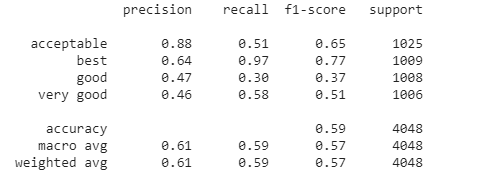

You can achieve these results or even better on this dataset with test data:

<br>


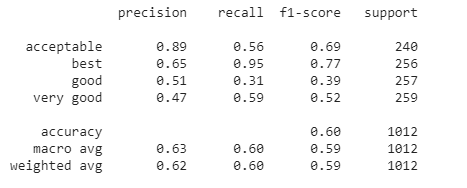



# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 04:23:57--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 04:23:57 (2.60 MB/s) - written to stdout [1671/1671]



# 2. Download wine review dataset 
https://www.kaggle.com/zynicide/wine-reviews
dataset with products between 5 review classes

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/winemag-data_first150k.csv


--2021-05-05 04:24:28--  http://ckl-it.de/wp-content/uploads/2021/01/winemag-data_first150k.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1447273 (1.4M) [text/csv]
Saving to: ‘winemag-data_first150k.csv.2’

winemag-data_first1 100%[===================>]   1.38M  1.91MB/s    in 0.7s    

2021-05-05 04:24:29 (1.91 MB/s) - ‘winemag-data_first150k.csv.2’ saved [1447273/1447273]



In [ ]:
import pandas as pd
test_path = '/content/winemag-data_first150k.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
1458,good,"Full of yellow fruits, ripe apples and soft ac..."
378,acceptable,Barnyard aromas atop berry scents make for a n...
17,very good,An aromatic twist of passion fruit plays on th...
2456,very good,Wood smoke and black pepper aromas start this ...
2103,best,"Talk about magnetic aromas of bacon, tobacco a..."
...,...,...
1464,acceptable,The flint soil of the vineyard shows in the st...
3942,acceptable,"Fruit-forward and simple, with the sugared tas..."
1871,very good,Bryan Babcock makes plenty of more expensive P...
1945,good,"Berry and plum aromas are spicy and saucy, wit..."


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no

trainable_pipe = nlu.load('train.classifier')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50] )


# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50] ,output_level='document')
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence_embedding_use,origin_index,trained_classifier_confidence_confidence,document,y,sentence,trained_classifier,text
0,"[0.026885146275162697, -0.06771063804626465, 0...",1458,0.620346,"Full of yellow fruits, ripe apples and soft ac...",good,"[Full of yellow fruits, ripe apples and soft a...",good,"Full of yellow fruits, ripe apples and soft ac..."
1,"[0.04962018504738808, 0.0652838945388794, -0.0...",378,0.543338,Barnyard aromas atop berry scents make for a n...,acceptable,[Barnyard aromas atop berry scents make for a ...,good,Barnyard aromas atop berry scents make for a n...
2,"[0.017539022490382195, -0.010785154066979885, ...",17,0.607028,An aromatic twist of passion fruit plays on th...,very good,[An aromatic twist of passion fruit plays on t...,good,An aromatic twist of passion fruit plays on th...
3,"[0.016984855756163597, -0.010578665882349014, ...",2456,0.602528,Wood smoke and black pepper aromas start this ...,very good,[Wood smoke and black pepper aromas start this...,good,Wood smoke and black pepper aromas start this ...
4,"[0.02070983126759529, -0.05402781069278717, -0...",2103,0.591057,"Talk about magnetic aromas of bacon, tobacco a...",best,"[Talk about magnetic aromas of bacon, tobacco ...",good,"Talk about magnetic aromas of bacon, tobacco a..."
5,"[-0.008546369150280952, -8.575373067287728e-05...",3448,0.611285,"Smoky, oaky, charred flavors of savory plum an...",good,"[Smoky, oaky, charred flavors of savory plum a...",good,"Smoky, oaky, charred flavors of savory plum an..."
6,"[0.0020979971159249544, -0.059595026075839996,...",1556,0.600705,"Made entirely with Nero d'Avola, this offers a...",good,"[Made entirely with Nero d'Avola, this offers ...",good,"Made entirely with Nero d'Avola, this offers a..."
7,"[0.03075247071683407, -0.05452873930335045, -0...",3453,0.614901,Remarkably strong cinnamon characterizes the n...,good,[Remarkably strong cinnamon characterizes the ...,good,Remarkably strong cinnamon characterizes the n...
8,"[-0.005710848607122898, -0.054149989038705826,...",3729,0.568524,"A sensational bottle at this price, it's ripe ...",very good,"[A sensational bottle at this price, it's ripe...",good,"A sensational bottle at this price, it's ripe ..."
9,"[0.028862619772553444, -0.05910215526819229, -...",996,0.605391,"Produced from 25-year-old vines, this is a fre...",good,"[Produced from 25-year-old vines, this is a fr...",good,"Produced from 25-year-old vines, this is a fre..."


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('It was one of the best wines i ever tasted .')

,sentence_embedding_use,origin_index,trained_classifier_confidence_confidence,document,sentence,trained_classifier
0,"[0.0249565988779068, 0.02628515101969242, -0.0...",0,0.529498,It was one of the best wines i ever tasted .,[It was one of the best wines i ever tasted .],good


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['classifier_dl'] has settable params:
pipe['classifier_dl'].setMaxEpochs(3)                | Info: Maximum number of epochs to train | Currently set to : 3
pipe['classifier_dl'].setLr(0.005)                   | Info: Learning Rate | Currently set to : 0.005
pipe['classifier_dl'].setBatchSize(64)               | Info: Batch size | Currently set to : 64
pipe['classifier_dl'].setDropout(0.5)                | Info: Dropout coefficient | Currently set to : 0.5
pipe['classifier_dl'].setEnableOutputLogs(True)      | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
>>> pipe['use@tfhub_use'] has settable params:
pipe['use@tfhub_use'].setDimension(512)              | Info: Number of embedding dimensions | Currently set to : 512
pipe['use@tfhub_use'].setLoadSP(False)               | Info: Whether to load SentencePiece ops file which is required only by multi

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.classifier')
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))
preds

              precision    recall  f1-score   support

  acceptable       0.00      0.00      0.00        20
        best       0.00      0.00      0.00        20
        good       0.00      0.00      0.00        31
   very good       0.29      1.00      0.45        29

    accuracy                           0.29       100
   macro avg       0.07      0.25      0.11       100
weighted avg       0.08      0.29      0.13       100



,sentence_embedding_use,origin_index,trained_classifier_confidence_confidence,document,y,sentence,trained_classifier,text
0,"[0.026885146275162697, -0.06771063804626465, 0...",1458,0.393935,"Full of yellow fruits, ripe apples and soft ac...",good,"[Full of yellow fruits, ripe apples and soft a...",very good,"Full of yellow fruits, ripe apples and soft ac..."
1,"[0.04962018504738808, 0.0652838945388794, -0.0...",378,0.395312,Barnyard aromas atop berry scents make for a n...,acceptable,[Barnyard aromas atop berry scents make for a ...,very good,Barnyard aromas atop berry scents make for a n...
2,"[0.017539022490382195, -0.010785154066979885, ...",17,0.567956,An aromatic twist of passion fruit plays on th...,very good,[An aromatic twist of passion fruit plays on t...,very good,An aromatic twist of passion fruit plays on th...
3,"[0.016984855756163597, -0.010578665882349014, ...",2456,0.577995,Wood smoke and black pepper aromas start this ...,very good,[Wood smoke and black pepper aromas start this...,very good,Wood smoke and black pepper aromas start this ...
4,"[0.02070983126759529, -0.05402781069278717, -0...",2103,0.526734,"Talk about magnetic aromas of bacon, tobacco a...",best,"[Talk about magnetic aromas of bacon, tobacco ...",very good,"Talk about magnetic aromas of bacon, tobacco a..."
...,...,...,...,...,...,...,...,...
95,"[0.05499161034822464, -0.04508962109684944, -0...",392,0.437371,This lightly aromatic wine offers notes of her...,acceptable,[This lightly aromatic wine offers notes of he...,very good,This lightly aromatic wine offers notes of her...
96,"[0.03258365020155907, -0.036026667803525925, -...",1376,0.384945,"Brilliant aromatics here, just stupendously at...",best,"[Brilliant aromatics here, just stupendously a...",very good,"Brilliant aromatics here, just stupendously at..."
97,"[0.004543728660792112, -0.06775235384702682, -...",3182,0.405291,This sparkling wine is intense with startling ...,acceptable,[This sparkling wine is intense with startling...,very good,This sparkling wine is intense with startling ...
98,"[0.0255692508071661, 0.04986872524023056, -0.0...",3709,0.456385,The nose is like a veil of Golden Delicious ap...,very good,[The nose is like a veil of Golden Delicious a...,very good,The nose is like a veil of Golden Delicious ap...


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(90)  
trainable_pipe['trainable_classifier_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

  acceptable       0.88      0.51      0.65      1025
        best       0.64      0.97      0.77      1009
        good       0.47      0.30      0.37      1008
   very good       0.46      0.58      0.51      1006

    accuracy                           0.59      4048
   macro avg       0.61      0.59      0.57      4048
weighted avg       0.61      0.59      0.57      4048



#  8. evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

  acceptable       0.89      0.56      0.69       240
        best       0.65      0.95      0.77       256
        good       0.51      0.31      0.39       257
   very good       0.47      0.59      0.52       259

    accuracy                           0.60      1012
   macro avg       0.63      0.60      0.59      1012
weighted avg       0.62      0.60      0.59      1012



# 9. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 10. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was one of the best wines i ever tasted .')
preds

,sentence_embedding_from_disk,from_disk_confidence_confidence,origin_index,document,sentence,from_disk,text
0,"[[-0.0787801593542099, 0.1528548002243042, 0.1...",[0.9994293],8589934592,It was one of the best wines i ever tasted .,[It was one of the best wines i ever tasted .],[best],It was one of the best wines i ever tasted .


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)              | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncod